In [1]:
import yfinance as yf
import pandas_datareader.data as web
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, binom
import pandas_datareader as pdr

In [2]:
# Class 7/19

In [3]:
# GNP & GDP always quarterly
data = web.DataReader('GNP','fred', start = '1945-01-01', end = '2019-12-31')
data.head()

,GNP
DATE,
1947-01-01,244.142
1947-04-01,247.063
1947-07-01,250.716
1947-10-01,260.981
1948-01-01,267.133


<Axes: xlabel='DATE'>

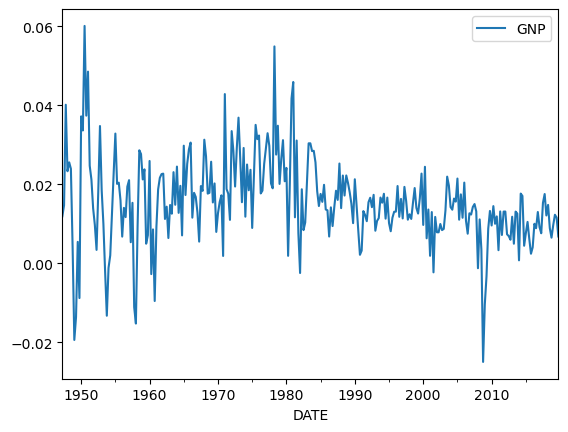

In [4]:
gnp_growthrate = np.log(data).diff().dropna()
gnp_growthrate.plot()

In [5]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg

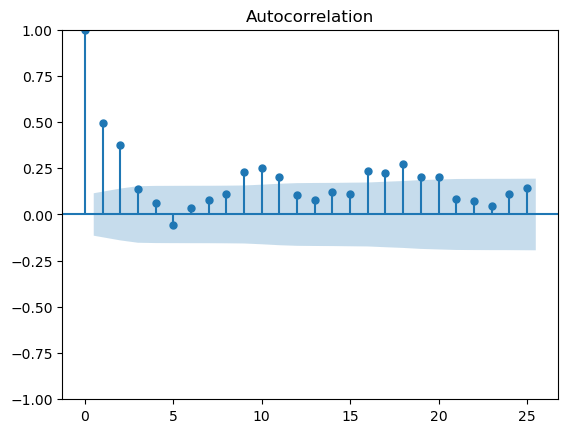

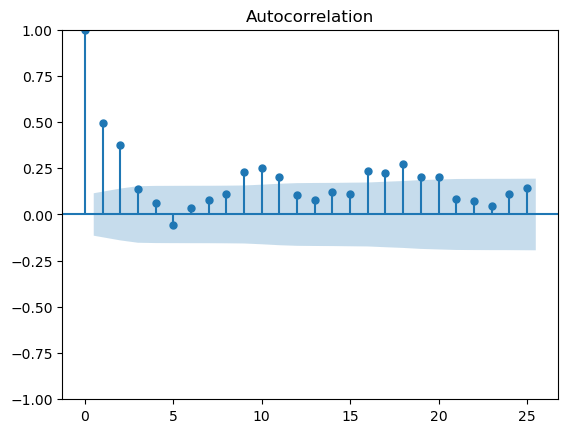

In [6]:
plot_acf(gnp_growthrate)

In [7]:
model = AutoReg(gnp_growthrate,3)
print(model.fit().summary())
# AR 3 is 2*np.pi / np.arccos(1.8 / np.absolute(1.8 + 0.72j))

                            AutoReg Model Results                             
Dep. Variable:                    GNP   No. Observations:                  291
Model:                     AutoReg(3)   Log Likelihood                 943.271
Method:               Conditional MLE   S.D. of innovations              0.009
Date:                Mon, 14 Aug 2023   AIC                          -1876.541
Time:                        18:20:25   BIC                          -1858.226
Sample:                    01-01-1948   HQIC                         -1869.202
                         - 10-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0072      0.001      6.528      0.000       0.005       0.009
GNP.L1         0.4313      0.058      7.486      0.000       0.318       0.544
GNP.L2         0.2378      0.061      3.877      0.0

/Users/meixingzhi/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

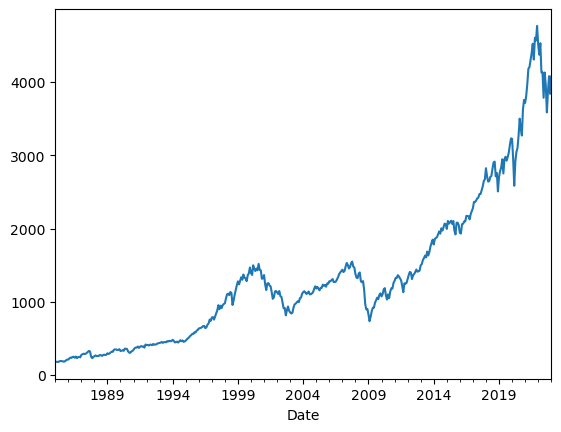

In [8]:
data2 = yf.download('^GSPC', start='1985-01-01', end='2023-01-31', interval='1mo')['Adj Close']
data2.plot()

<Axes: xlabel='Date'>

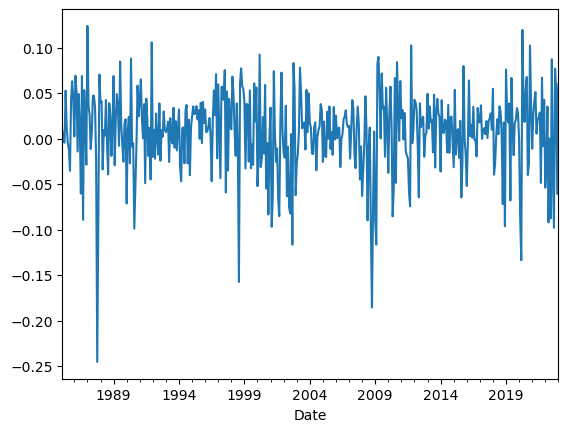

In [9]:
r = np.log(data2).diff().dropna()
r.plot()

In [10]:
sm.OLS(r,sm.add_constant(r.shift()), missing = 'drop').fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.09324
Date:                Mon, 14 Aug 2023   Prob (F-statistic):              0.760
Time:                        18:20:26   Log-Likelihood:                 768.27
No. Observations:                 455   AIC:                            -1533.
Df Residuals:                     453   BIC:                            -1524.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0067      0.002      3.175      0.002       0.003       0.011
Adj Close      0.0144      0.047      0.305      0.760      -0.078       0.107
==============================================================================
Omnibus:                       87.822   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.670
Skew:                          -0.949   Prob(JB):                     6.02e-50
Kurtosis:                       5.890   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
sp_daily = yf.download('^GSPC', start='2019-01-01', interval='1d')['Adj Close']

[*********************100%***********************]  1 of 1 completed


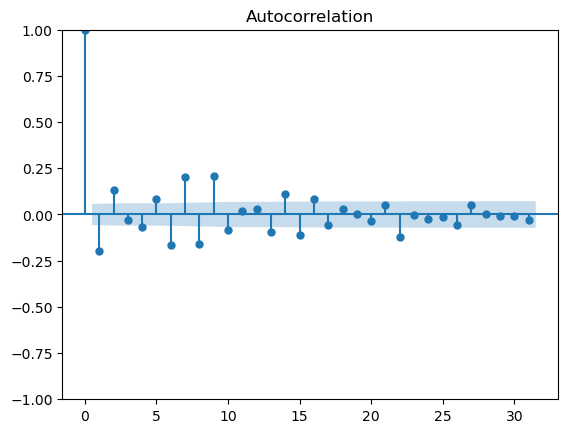

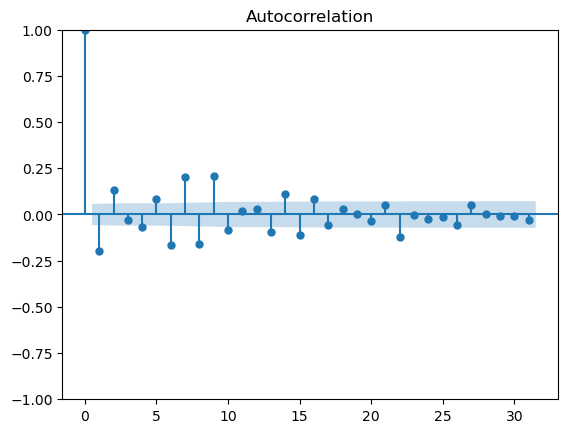

In [12]:
r_daily = np.log(sp_daily).diff().dropna()
plot_acf(r_daily)

/Users/meixingzhi/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


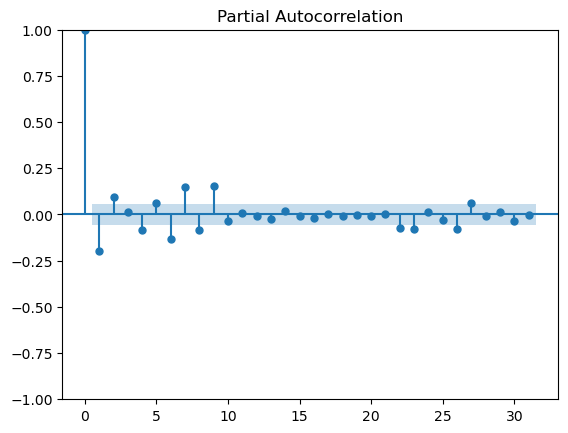

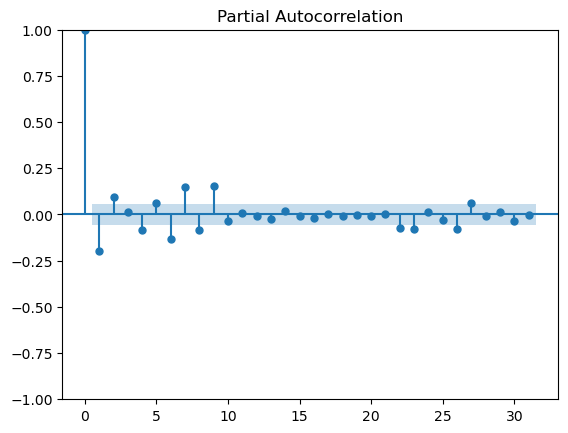

In [13]:
plot_pacf(r_daily)

In [14]:
data3 = web.DataReader(['U1RATE','CPIAUCSL','FEDFUNDS'],'fred', start = '1955-01-01', end = '2022-12-31')
data3.head()

,U1RATE,CPIAUCSL,FEDFUNDS
DATE,,,
1955-01-01,1.4,26.77,1.39
1955-02-01,1.3,26.82,1.29
1955-03-01,1.3,26.79,1.35
1955-04-01,1.3,26.79,1.43
1955-05-01,1.1,26.77,1.43


In [15]:
data3['INFL'] = np.log(data3['CPIAUCSL']).diff()

In [16]:
data3.dropna(inplace=True)
data3.drop(columns = ['CPIAUCSL'],inplace=True)

In [17]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [18]:
results = VAR(data3).fit(maxlags=4)
results.summary()

/Users/meixingzhi/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 14, Aug, 2023
Time:                     18:20:27
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -17.2993
Nobs:                     811.000    HQIC:                  -17.4385
Log likelihood:           3693.21    FPE:                2.44842e-08
AIC:                     -17.5252    Det(Omega_mle):     2.33436e-08
--------------------------------------------------------------------
Results for equation U1RATE
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.027785         0.014915            1.863           0.062
L1.U1RATE           1.184057         0.035384           33.464           0.000
L1.FEDFUNDS        -0.011756         0.011790           -0.997     

In [19]:
# Class 7/24

In [20]:
# causality
results.test_causality('INFL',['U1RATE','FEDFUNDS']).summary()

Test statistic,Critical value,p-value,df
6.199,1.942,0.000,"(8, 2394)"


In [21]:
results.sigma_u

,U1RATE,FEDFUNDS,INFL
U1RATE,0.022036,-0.002454,0.000035
FEDFUNDS,-0.002454,0.199498,0.000071
INFL,0.000035,0.000071,0.000005


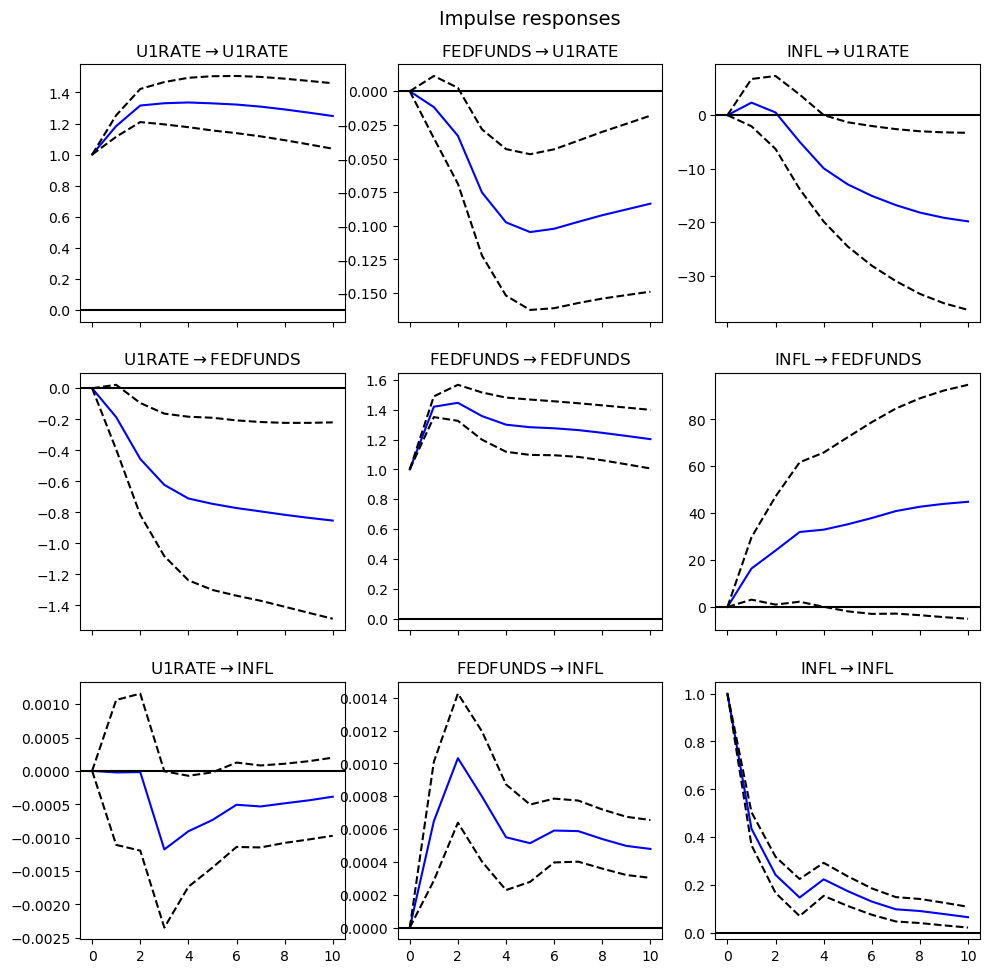

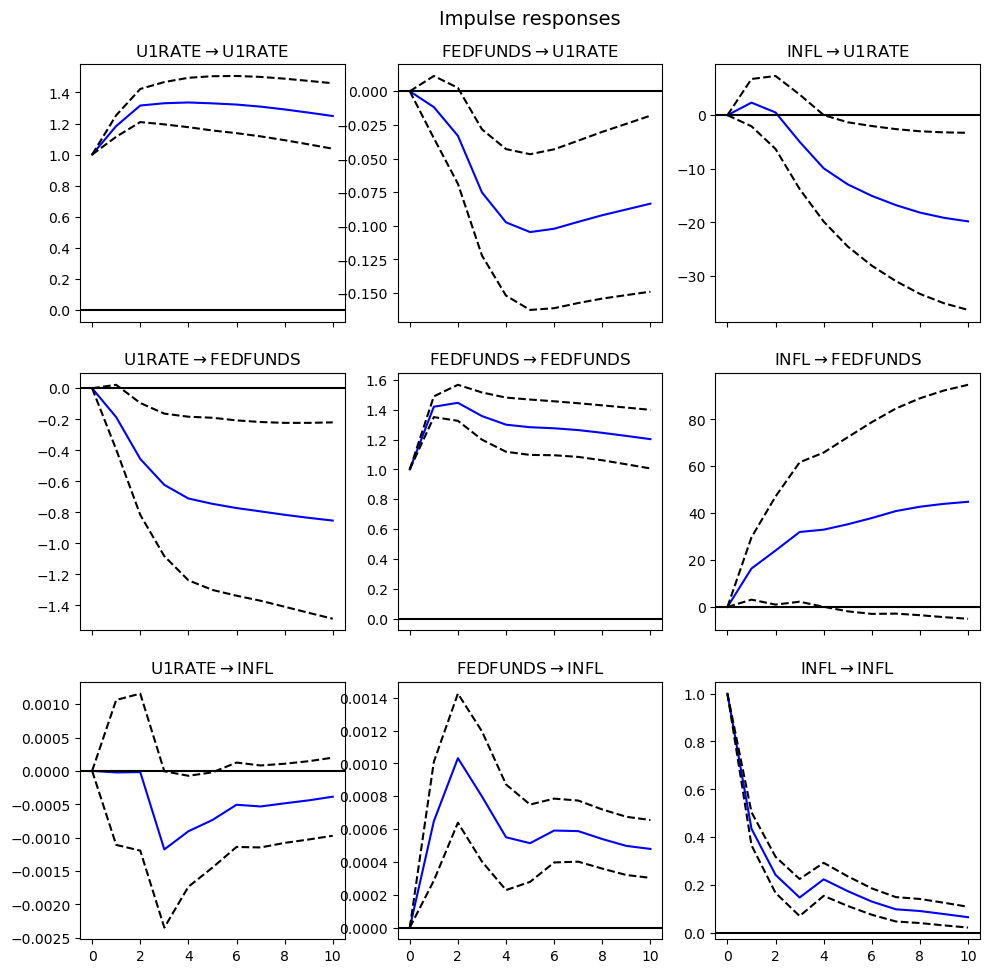

In [22]:
results.irf(10).plot()

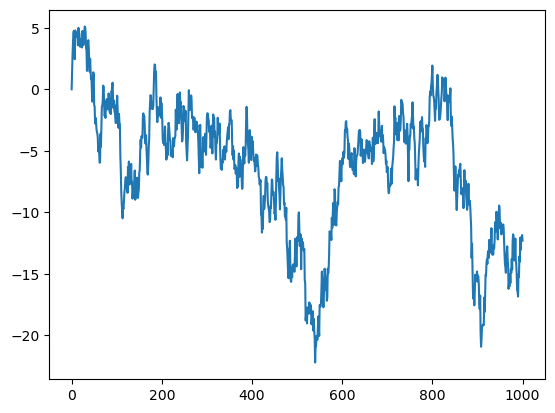

In [23]:
# The unit root hypothesis

v = np.random.normal(size = 1001)
v[0] = 0
rho = 1
y = np.zeros(1001)
for t in range(1,1001):
    # regular:
    y[t] = rho * y[t-1] + v[t]
    # determinate trend:
    #y[t] = 0.1 + rho * y[t-1] + v[t]
plt.plot(y)

In [24]:
def sim_arl(rho = 1, n=1001):
    v = np.random.normal(size = n)
    v[0] = 0
    y = np.zeros(n)
    for t in range(1,1001):
        y[t] = rho * y[t-1] + v[t]
    dy = y[1:] - y[:-1]
    x = y[:-1]
    return sm.OLS(dy, x).fit().tvalues[0]

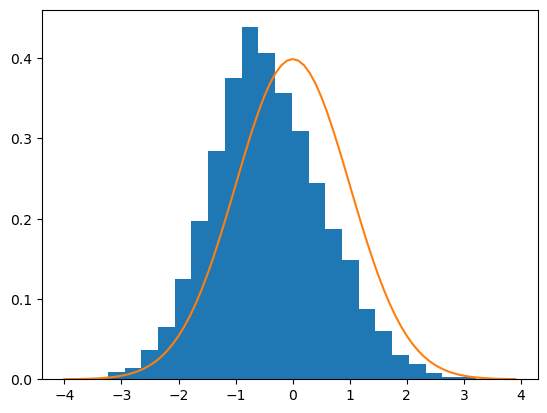

In [25]:
from scipy.stats import norm
plt.hist([sim_arl() for _ in range(10000)], bins = 25, density = True)
# shift to the left
# t value is the not the normal distrubtion
plt.plot(np.arange(-4,4,0.1), norm.pdf(np.arange(-4,4,0.1)))

In [26]:
# Class 7/26

In [27]:
def random_walk(N =1, T = 10):
    # noice term
    v = np.random.normal(size = T*N+1, scale = np.sqrt(1/N))
    v[0] = 0
    y = v.cumsum()
    return y

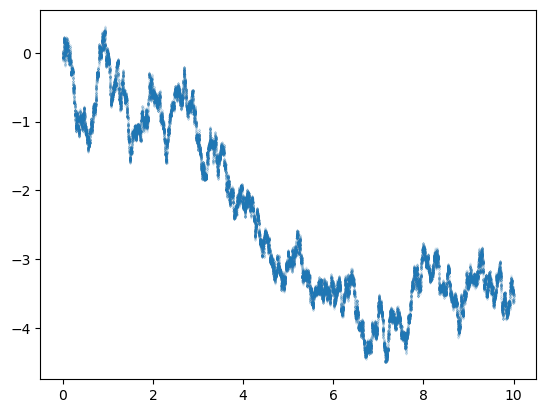

In [28]:
# Brownian motion
N = 10000
T = 10
plt.scatter(np.arange(0,T+1/N,1/N), random_walk(N,T), s = 20/N)

In [29]:
# Class 7/31

In [30]:
def sim_arl(rho = 0.5, n=1001):
    v = np.random.normal(size = n)
    v[0] = 0
    y = np.zeros(n)
    for t in range(1,1001):
        y[t] = rho * y[t-1] + v[t]
    x = y[:-1]
    result = sm.OLS(y[1:], x).fit()
    return np.sqrt(n)*(result.params[0] - rho)
    # random walk return: 
    # return n*(result.params[0] - rho) 

In [31]:
rho = 0.5
simresult = [sim_arl(rho = rho) for _ in range(10000)]

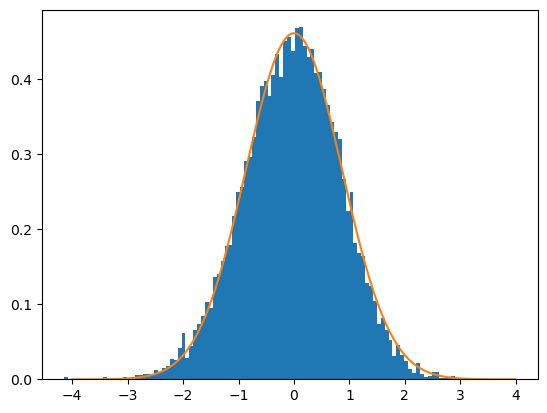

In [32]:
plt.hist(simresult, bins = 100, density=True)
plt.plot(np.arange(-4,4,0.01), norm.pdf(np.arange(-4,4,0.01), scale = np.sqrt(1-rho**2)))

In [33]:
def random_walk(N = 1, T = 10):
    v = np.random.normal(size = T * N + 1, scale=np.sqrt(1/N))
    v[0] = 0
    y = v.cumsum()
    return y

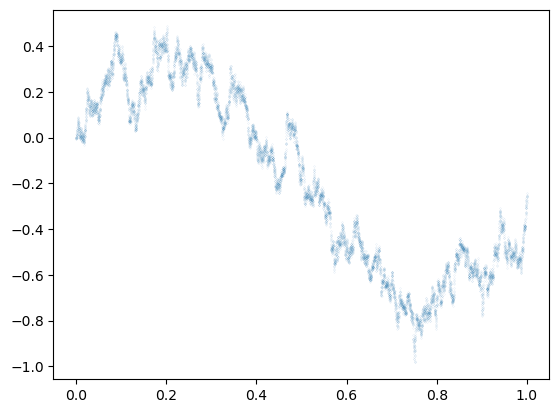

In [34]:
N = 10000
T = 1
plt.scatter(np.arange(0, T+1/N,1/N), random_walk(N,T), s = 20/N)

In [35]:
# Generate distrubtion of t*(rho_hat-1)
def rw_ols_coef_value():
    N = 10000
    y = random_walk(N=N, T=1)
    top = 0.5 * (y[N]**2-1)
    bottom = 1/N * (y**2).sum()
    return top/bottom

(array([0.00069746, 0.        , 0.        , 0.        , 0.        ,
        0.00034873, 0.00069746, 0.        , 0.00034873, 0.        ,
        0.00034873, 0.00034873, 0.00034873, 0.00034873, 0.00069746,
        0.        , 0.00069746, 0.        , 0.00034873, 0.00069746,
        0.        , 0.00034873, 0.00139492, 0.00034873, 0.00139492,
        0.        , 0.00104619, 0.00104619, 0.00139492, 0.00139492,
        0.00209239, 0.00348731, 0.00069746, 0.00069746, 0.00174366,
        0.00139492, 0.00209239, 0.00488224, 0.00244112, 0.00383604,
        0.00418477, 0.00348731, 0.00348731, 0.00278985, 0.00592843,
        0.0055797 , 0.00592843, 0.00662589, 0.00697462, 0.00871828,
        0.01150813, 0.01081067, 0.00941574, 0.01185686, 0.0111594 ,
        0.01290305, 0.01290305, 0.01360052, 0.01743656, 0.01952894,
        0.02301626, 0.01952894, 0.02510864, 0.02650357, 0.03766297,
        0.0268523 , 0.03626804, 0.03766297, 0.0380117 , 0.04359139,
        0.05056602, 0.0582381 , 0.06207415, 0.06

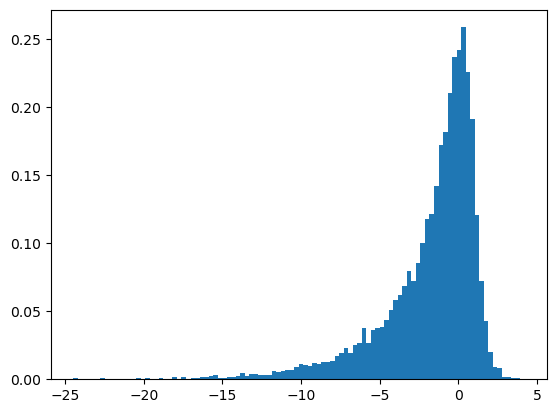

In [36]:
rw_coef_result = np.array([rw_ols_coef_value() for _ in range(10000)])
plt.hist(rw_coef_result, bins = 100, density=True)

In [37]:
# P-value
(rw_coef_result <= -0.869).mean()

0.4947

In [38]:
# random distrution of t-statistic of doing random walk
def rw_ols_t_value():
    N = 10000
    y = random_walk(N=N, T=1)
    top = 0.5 * (y[N]**2-1)
    bottom = np.sqrt(1/N * (y**2).sum())
    return top/bottom

(array([0.00152498, 0.00304996, 0.00152498, 0.00304996, 0.00304996,
        0.00304996, 0.00609992, 0.00762491, 0.00762491, 0.00914989,
        0.01372483, 0.00914989, 0.01219985, 0.02134974, 0.03049962,
        0.03354959, 0.02287472, 0.04422445, 0.04574943, 0.05947427,
        0.04727442, 0.0731991 , 0.07624906, 0.09454883, 0.09759879,
        0.12657344, 0.12199849, 0.14792317, 0.17232287, 0.19062264,
        0.22569721, 0.29279638, 0.25314687, 0.28212151, 0.29584634,
        0.2912714 , 0.3476957 , 0.36142053, 0.37057042, 0.39344514,
        0.41174491, 0.42394476, 0.41326989, 0.46664423, 0.43461963,
        0.44681948, 0.44071955, 0.38429525, 0.34617072, 0.41021993,
        0.36142053, 0.32177102, 0.32787095, 0.28669646, 0.34159578,
        0.34464574, 0.30194627, 0.30194627, 0.32482099, 0.26534672,
        0.27144665, 0.2348471 , 0.25314687, 0.21807231, 0.19519759,
        0.18147276, 0.15859804, 0.19367261, 0.17384785, 0.14639819,
        0.14182325, 0.10827366, 0.14029827, 0.09

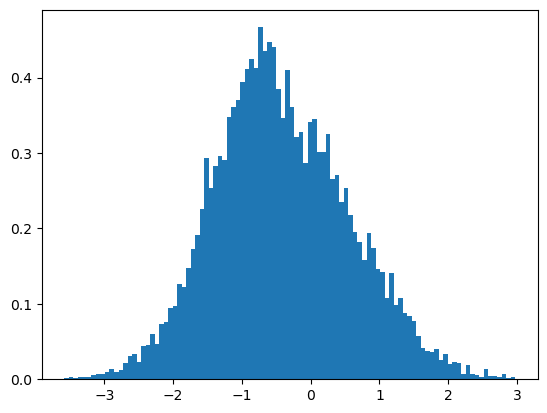

In [39]:
rw_t_dist = np.array([rw_ols_t_value() for _ in range(10000)])
plt.hist(rw_t_dist, bins = 100, density=True)

In [40]:
# P-value
(rw_t_dist <= -0.869).mean()

0.3394

In [41]:
from statsmodels.tsa.stattools import adfuller
adfuller(df['r2'], maxlag=0, autolag=None, regresults='c')

NameError: name 'df' is not defined

In [42]:
# Test for NASDAQ BUBBLE
yf.pdr_override()
ndaq = web.get_data_yahoo('^IXIC', interval = '1mo' , start = '1985-01-01', end = '2014-12-31')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [43]:
cpi = pdr.get_data_fred('CPIAUCSL', start = '1985-01-01', end = '2014-12-31')

In [44]:
data = cpi.join(ndaq)
realP = data['Adj Close'] / data['CPIAUCSL']
logRealP = np.log(realP)

<Axes: xlabel='DATE'>

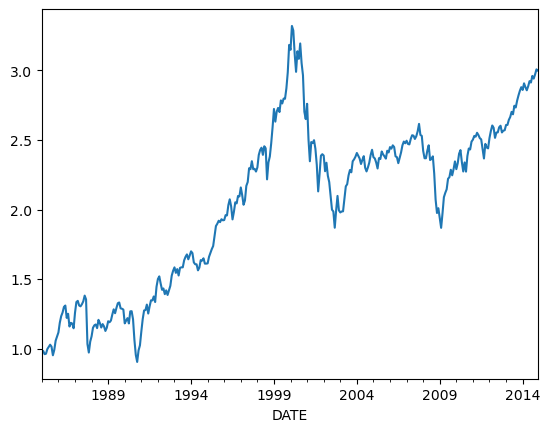

In [45]:
# real nasdaq
logRealP.plot()

In [46]:
adfuller(logRealP)

(-1.2953996563556378,
 0.6312743395414577,
 1,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 -885.6696924375381)

In [47]:
# adf test with expending window, t-statis will go up at BUBBLE and go down
T = len(logRealP)
# first 10% of the data
T0 = int(0.1 * T)
#  t-s: -2.08, but we are looking for a postive result
adfuller(logRealP[:T0])
t_stats = np.array([])
# adding each month, when date hit 1997 the adfuller become postive and hit 2 at 2000, 
for t in range(T0, T):
    t_stats = np.append(t_stats, adfuller(logRealP[:t], maxlag=0, regression='c', autolag=None)[0])

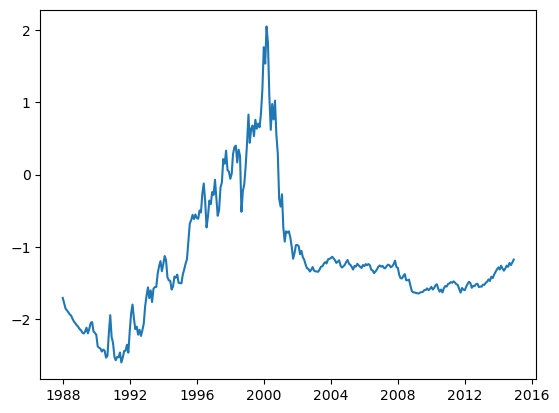

In [48]:
plt.plot(logRealP.index[T0:],t_stats)

In [49]:
# adf with rolling window
deltaT = 72
t_stats_rolling = np.zeros(T-deltaT+1)
for t in range(T-deltaT+1):
    t_stats_rolling[t] = adfuller(logRealP[t:(t+deltaT)], maxlag=0, regression='c', autolag=None)[0]

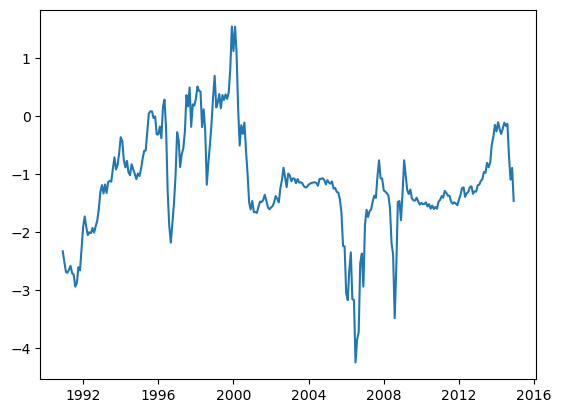

In [50]:
plt.plot(logRealP.index[deltaT-1:], t_stats_rolling)

In [51]:
# Class 8/2

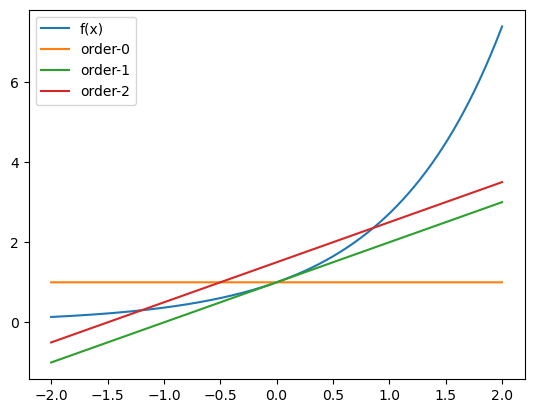

In [52]:
# Tyler expendion
x = np.arange(-2,2,0.001)
plt.plot(x, np.exp(x), label = 'f(x)')
plt.plot(x, np.repeat(1, len(x)), label = 'order-0')
plt.plot(x, 1 + x, label = 'order-1')
plt.plot(x, 1 + x + 1/2, label = 'order-2')
plt.legend()

#### brownian motion
1) The think you want perdict is the number its now
2) E[]
3) BM has infinate variation
4) BM has none zero qudartic variation:  
4.1) dt * dt = 0, dw * dw = dt  
4.2) BM with variance sigma^2  
4.3) BM with drift: dx(t) = mu * dt + sigma * dw(t)  
4.4) Geomatic BM: ds(t)/s(t) = mu * dt + sigma * dw(t) => ds(t) = mu*sd(t) + rs(t)*dw(t) for modeling stock price => drift term + random term

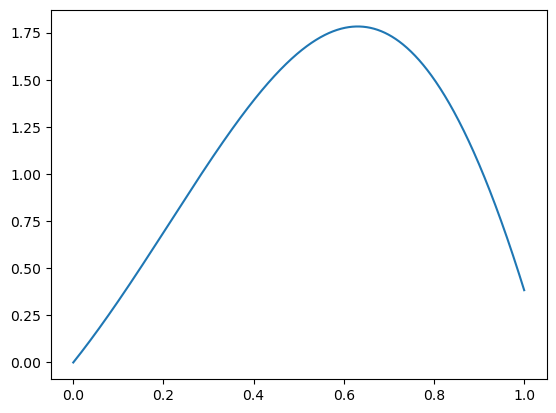

In [53]:
# variation
def f(x):
    return np.exp(x)*np.sin(3*x)
t = np.arange(0,1.001,0.001)
plt.plot(t, f(t))

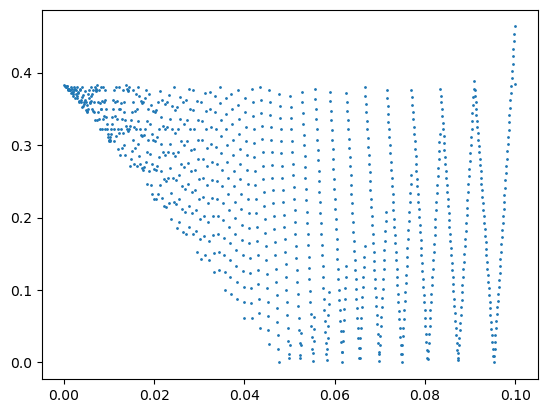

In [54]:
def variation(dt):
    t = np.arange(0, 1+dt, dt)
    return np.abs(np.diff(f(t)).sum())

# in each step, calculate the variation
plt.scatter(np.arange(0.1,0,-0.0001), [variation(dt) for dt in np.arange(0.1,0,-0.0001)], s = 1)

In [55]:
# define brownian motion
def gen_bm(dt = 0.0001, T = 1):
    t = np.arange(0, 1+dt/2, dt)
    # star at zero
    w = np.zeros(len(t))
    # every increament need to have random cosnt
    for i in range(1,len(w)):
        w[i] = w[i-1]+np.random.normal(scale = np.sqrt(dt))
    return (t,w)

In [56]:
# variation of bm
def bm_variation(dt):
    t,w = gen_bm(dt)
    # plot
    plt.plot(t,w)
    return np.abs(np.diff(w).sum())

[[<matplotlib.collections.PathCollection at 0x13f8b4310>,

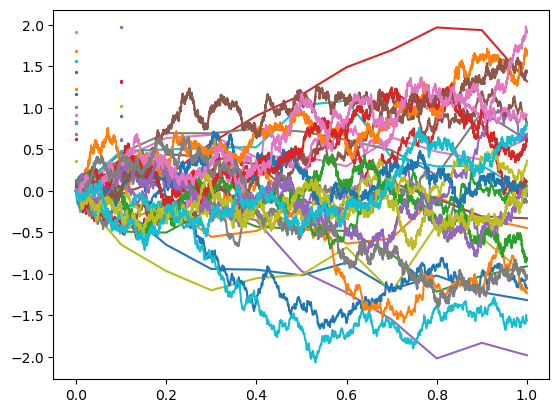

In [57]:
[[plt.scatter(dt, bm_variation(dt), s = 2) for _ in range(10)] for dt in [0.1, 0.001, 0.0001]]

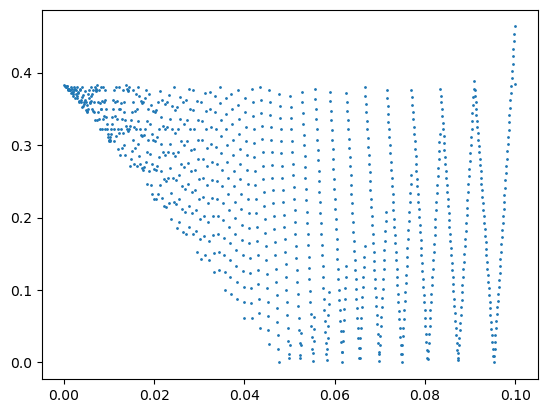

In [58]:
# qudartic variation
def qudartic_variation(dt):
    t = np.arange(0, 1+dt, dt)
    return np.square(np.diff(f(t)).sum())

# in each step, calculate the variation
plt.scatter(np.arange(0.1,0,-0.0001), [variation(dt) for dt in np.arange(0.1,0,-0.0001)], s = 1)

In [59]:
def bm_qudartic_variation(dt):
    t,w = gen_bm(dt=dt, T=1/2)
    # plot
    #plt.plot(t,w)
    return np.square(np.diff(w).sum())

In [60]:
bm_qudartic_variation(0.0001)

0.023006138529997777

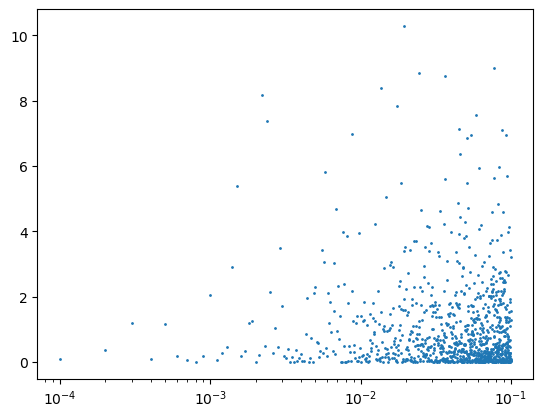

In [61]:
plt.scatter(np.arange(0.1,0,-0.0001), [bm_qudartic_variation(dt) for dt in np.arange(0.1,0,-0.0001)], s = 1)
plt.xscale('log')

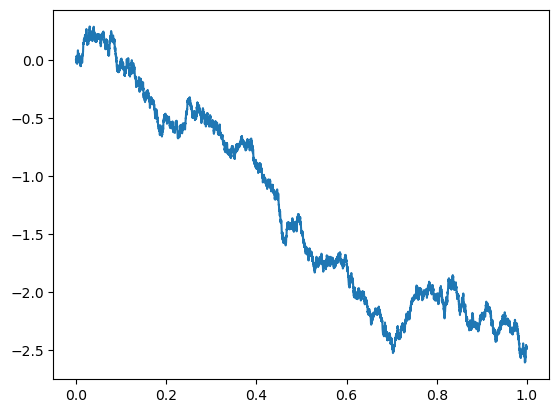

In [91]:
# BM with drft
def gm_abm(mu = 0, sigma = 1, dt = 0.0001, T = 1):
    t,w = gen_bm(dt = dt, T = T)
    return (t,mu*t + sigma*w)
t,x = gm_abm(mu = -3)
plt.plot(t,x)

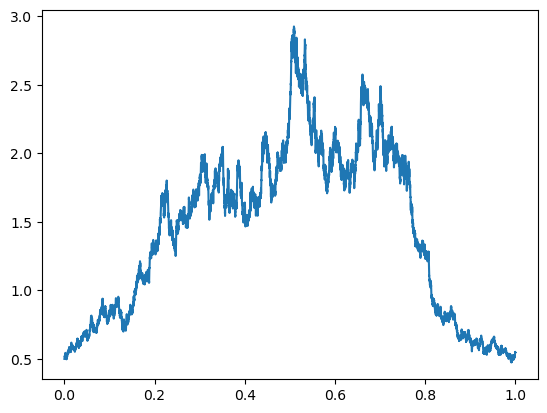

In [63]:
# Geomatic BM
def gm_gtm(s0 = 100, T = 1 ,dt = 0.0001, mu = 1, sigma = 1):
    t,w = gen_bm(dt = dt, T = T)
    s = np.zeros(len(t))
    s[0] = s0
    for i in range(1,len(s)):
        ds = mu * s[i-1] * dt + sigma * s[i-1] * (w[i] - w[i-1])
        s[i] = s[i-1] + ds
    return (t,s)

(t,s) = gm_gtm(s0=0.5)
plt.plot(t,s)

In [64]:
# Class 8/7

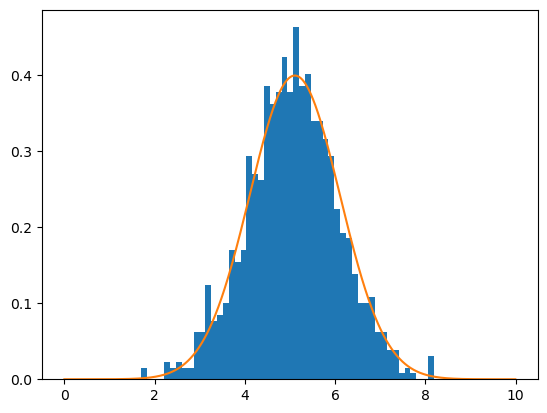

In [65]:
s0 = 100; mu = 1; sigma = 1; T = 1
log_s_T = np.array([gm_gtm(s0 = s0, mu = mu, sigma = sigma, T=T)[1][-1] for _ in range(1000)])
plt.hist(np.log(log_s_T), bins = 50, density=True)
plt.plot(np.arange(0,10,0.01), norm.pdf(np.arange(0,10,0.01), loc = np.log(s0) + (mu-1/2*(sigma**2)*T)))

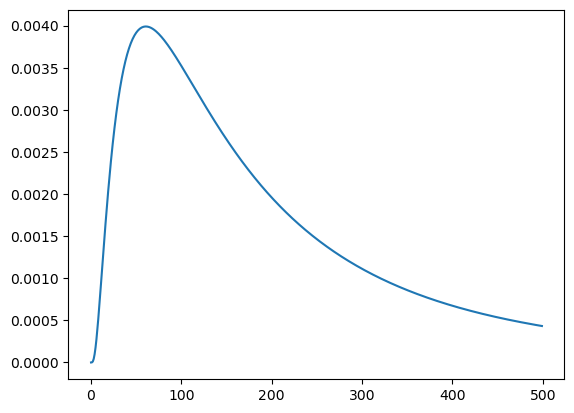

In [66]:
# log normal distribution
plt.plot(np.arange(500), lognorm.pdf(np.arange(500), scale = s0*np.exp(mu-1/2*(sigma**2)*T), s=sigma*np.sqrt(T)))

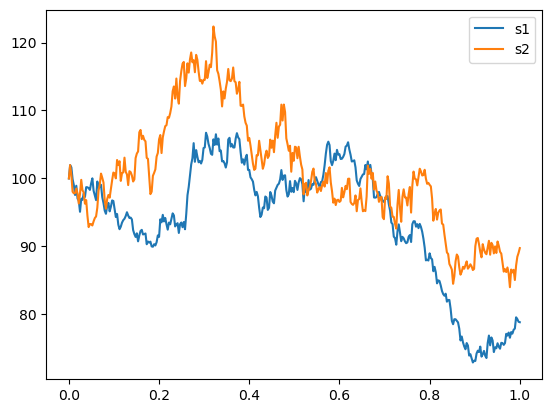

In [67]:
# Generaating correlated stock price
rho = 0.5; mu1 = 0.05; sigma1 = 0.2; mu2 = 0.05; sigma2 = 0.3; dt = 1/365
# Step 1 generate two BM indpendently
t,w1 = gen_bm(dt = dt, T=1)
_,w2 = gen_bm(dt = dt, T=1)

# Step 2 define dw1 and dw2
dw1 = np.diff(w1)
dw2 = np.diff(w2)

# create stock price array
s1 = np.zeros(len(t))
s2 = np.zeros(len(t))
s1[0] = 100
s2[0] = 100

# create two correlated scaled process
for i in range(1,len(t)):
    dx1 = sigma1*dw1[i-1]
    dx2 = rho*sigma2*dw1[i-1]+np.sqrt(1-rho**2)*sigma2*dw2[i-1]
    ds1 = mu1*s1[i-1]*dt+s1[i-1]*dx1
    ds2 = mu2*s2[i-1]*dt+s2[i-1]*dx2
    s1[i] = s1[i-1] + ds1
    s2[i] = s2[i-1] + ds2
    
plt.plot(t, s1, label = 's1')
plt.plot(t, s2, label = 's2')
plt.legend()

In [68]:
def gen_bm_n(dt=0.001, T=1, n=1):
    t = np.arange(0,T+dt/2,dt)
    w_n = np.zeros((len(t), n))
    for i in range(n):
        _, w = gen_bm(dt=dt, T=T)
        w_n[:,i] = w
    return (t,w_n)

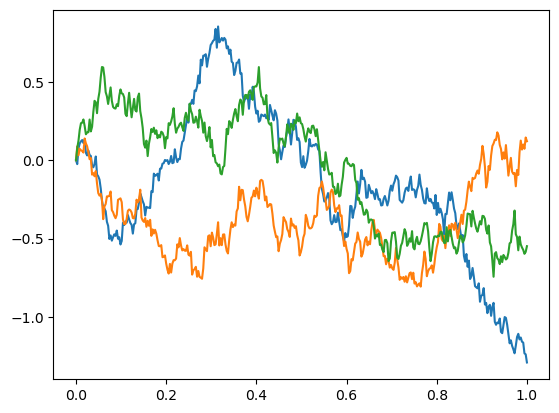

In [69]:
t,w = gen_bm_n(dt=1/365, T=1, n=3)
plt.plot(t,w)

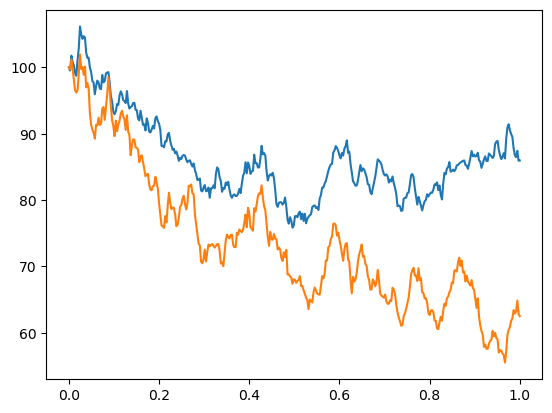

In [70]:
# Matrix
# Step 1 
C = np.array([[0.04, 0.03], [0.03, 0.09]])
mu = np.array([0.05,0.05])
dt = 1/365
L = np.linalg.cholesky(C) # 2 by 2 array
# Step 2 generate two BM
t,w = gen_bm_n(dt=dt, T=1, n=C.shape[0])
# define dw
dw = np.diff(w, axis=0)
# define stock price array
s = np.zeros(w.shape)
s[0] = [100,100]
dx = L.dot(dw.transpose()).transpose() # 365 by 2 shape
for i in range(1,len(t)):
    ds = (mu*dt + dx[i-1,:])*s[i-1,:]
    s[i,:] = s[i-1,:] + ds
plt.plot(t,s)

#### Binomal priceing model
Time(0,T) dividend into the time period

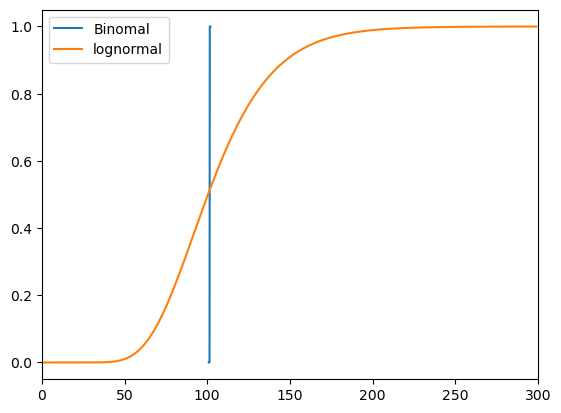

In [71]:
mu = 0.05; sigma = 0.30; T = 1; n = 1000; dt = T/n
u = np.exp(mu*dt)*(1+np.sqrt(np.exp(sigma**2*dt)-1))
d = np.exp(mu*dt)*(1-np.sqrt(np.exp(sigma**2*dt)-1))
p = 1/2
s_0 = 100
s_T = np.zeros(n+1)
prob = np.zeros(n+1)
for i in range(n+1):
    s_T[i] = s_0 * (u**i)*(d**(i-1))
    prob[i] = binom.pmf(i,n,p)
#plt.bar(s_T, prob)
plt.plot(s_T, prob.cumsum(), label = 'Binomal')
# compare
plt.plot(np.arange(0, 300), lognorm.cdf(np.arange(0, 300), scale = s_0*np.exp((mu-1/2*sigma**2)*T), s = sigma*np.sqrt(T)), label='lognormal')
plt.xlim((0, 300))
plt.legend()

In [72]:
# Class 8/9

#### Optional Pricing

1. EU Call Option  
security expires at some time t has a payout equal to max(s(t)-k,0)  
2. EU Put Option  
security expires at some time t has a payout equal to max(k-s(t),0)  
3. ASSUMPTIONS:  
3.1 stock prices are random  
3.2 all stock prices are always above zero  
3.3 investors can hold factional shares  
3.4 market is liquird  
3.5 short selling is allowed  
3.6 no arbitrage (no profit at zero call)   
4. Put-Call Parity  
EU put and call with strike at K, s(t) + p(t) = c(t) + ke^(-rf(T-t)), difference is the time to maturity of call option

#### Biniomal Optional Pricing Model  


In [73]:
def gen_S_T(s_0, sigma, T, n):
    dt = T/n
    u = np.exp(sigma*np.sqrt(dt)); d = 1/u
    S_T = np.zeros(n+1)
    for i in range(n+1):
        # terminal price
        S_T[i] = s_0*(u**(n-i))*(d**i)
    return (u,d,S_T)

In [74]:
s_0 = 100; sigma = 0.2; T = 1; n = 2
gen_S_T(s_0, sigma, T, n)

(1.151909910168909,
 0.8681234453945849,
 array([132.68964411, 100.        ,  75.36383164]))

In [75]:
def eu_call(s_0, K, rf, sigma, T, n):
    dt = T/n
    u,d,S_T = gen_S_T(s_0, sigma, T, n)
    q = (np.exp(rf*dt)-d)/(u-d)
    C_T = np.clip(S_T-K, 0, None)
    # from n to -1 to include zero
    prob = binom.pmf(np.arange(n, -1, -1), n, q)
    C_0 = np.exp(-n*rf*dt) *(prob*C_T).sum()
    return C_0

In [76]:
# strike price is at the money
s_0 = 100; sigma = 0.2; T = 1; n = 2; K = 100; rf = 0.06
eu_call(s_0, K, rf, sigma, T, n)

10.073318591923652

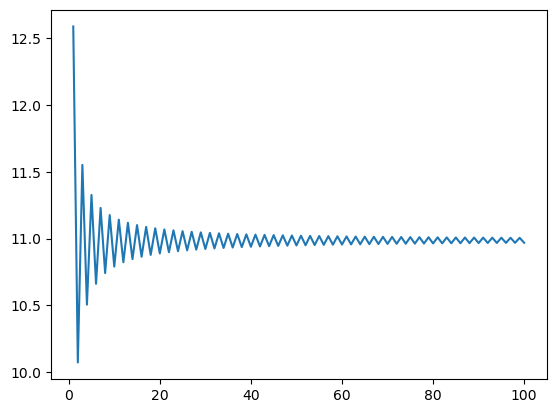

In [77]:
# K = 105 # out the price
N = 100
c = np.zeros(N)
for n in range(N):
    c[n] = eu_call(s_0, K, rf, sigma, T, n+1)
plt.plot(np.arange(1, N+1), c)

In [78]:
def eu_put(s_0, K, rf, sigma, T, n):
    dt = T/n
    u,d,S_T = gen_S_T(s_0, sigma, T, n)
    q = (np.exp(rf*dt)-d)/(u-d)
    P_T = np.clip(K-S_T, 0, None)
    # from n to -1 to include zero
    prob = binom.pmf(np.arange(n, -1, -1), n, q)
    P_0 = np.exp(-n*rf*dt) *(prob*P_T).sum()
    return P_0

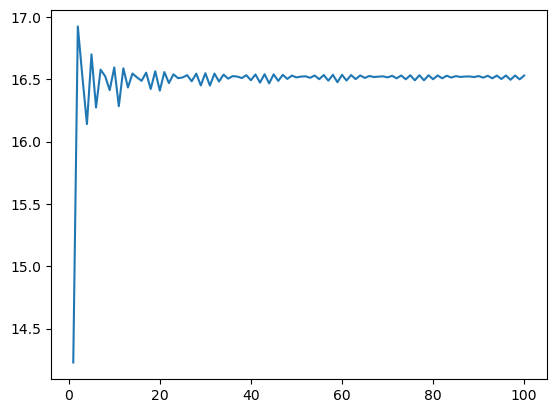

In [79]:
# strike price is at the money
s_0 = 100; sigma = 0.2; T = 1; n = 2; K = 100; rf = 0.06
eu_put(s_0, K, rf, sigma, T, n)
# strike out money
K = 120
N = 100
p = np.zeros(N)
for n in range(N):
    p[n] = eu_put(s_0, K, rf, sigma, T, n+1)
plt.plot(np.arange(1, N+1), p)

#### US option

In [80]:
# stock price tree
def gen_stock_tree(s_0, sigma, T, n):
    dt = T/n
    u = np.exp(sigma*np.sqrt(dt)); d = 1/u
    S = np.zeros((n+1,n+1))
    S[0,0] = s_0
    for j in range(1, n+1):
        S[:,j] = S[:,j-1]*u
        S[j,j] = S[j-1,j-1]*d
    return (u, d, S)

In [81]:
def us_put(s_0, K, rf, sigma, T, n):
    dt = T/n
    u,d,S = gen_stock_tree(s_0, sigma, T, n)
    q = (np.exp(rf*dt)-d)/(u-d)
    P = np.zeros((n+1,n+1))
    P[:,n] = np.clip(K-S[:,n], 0, None)
    # time & going backward & j 是 x
    for j in range(n-1, -1, -1):
        # i 是 y
        for i in range(j+1):
            P[i,j] = max(np.exp(-rf*dt)*(q*P[i,j+1]+(1-q)*P[i+1,j+1]), K-S[i,j])
    return P[0,0]

In [82]:
# at money
K =100
us_put(s_0, K, rf, sigma, T, 3)

6.099357008892412

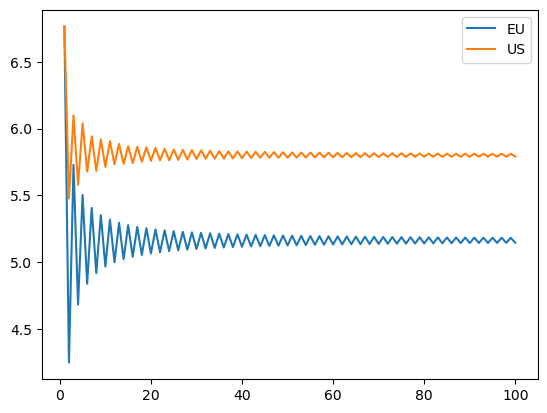

In [83]:
N = 100
p1 = np.zeros(N)
p2 = np.zeros(N)
for n in range(N):
    p1[n] = eu_put(s_0, K, rf, sigma, T, n+1)
    p2[n] = us_put(s_0, K, rf, sigma, T, n+1)
plt.plot(np.arange(1, N+1), p1, label = 'EU')
plt.plot(np.arange(1, N+1), p2, label = 'US')
plt.legend()

#### BS

In [84]:
def bsm_call(s_0, K, rf, sigma, T):
    d1 = (np.log(s_0/K)+(rf+1/2*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return s_0 * norm.cdf(d1) - K*np.exp(-rf*T) * norm.cdf(d2)

def bsm_put(s_0, K, rf, sigma, T):
    d1 = (np.log(s_0/K)+(rf+1/2*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return K*np.exp(-rf*T) * norm.cdf(d2) - s_0 * norm.cdf(d1) 

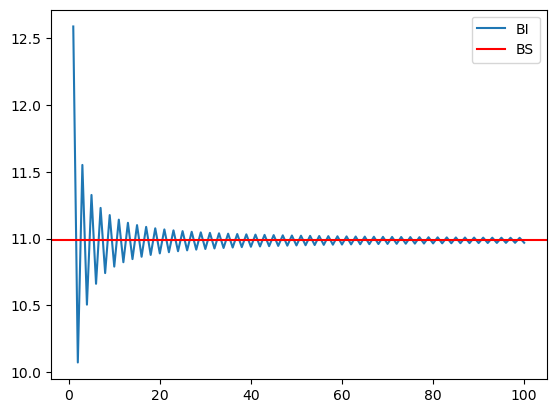

In [85]:
N = 100
c = np.zeros(N)
for n in range(N):
    c[n] = eu_call(s_0, K, rf, sigma, T, n+1)
plt.plot(np.arange(1, N+1), c, label = 'BI')
plt.axhline(y = bsm_call(s_0, K, rf, sigma, T), label = 'BS', color = 'red')
plt.legend()

In [86]:
# Class 8/14

#### BSM model input:  
S0: stock price  
K: strike price  
Rf: Risk free rate(treasury rate/overnight swap)  
T: time to expire  
Sigma: votility of stock  

#### Excample:  TSLA Option Chain  
S0 = 240  
K = 240  
C = 12.55 => call option price  
T = 1/12  
Rf = 0.0535  


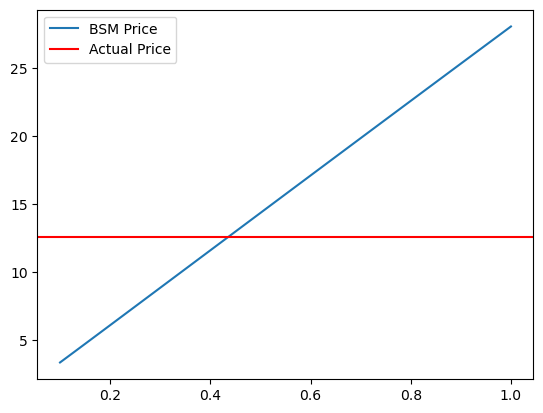

In [87]:
s_0 = 240; K = 240; C = 12.55; T = 1/12; rf = 0.055
sigma_array = np.arange(0.1,1.01,0.01)
call_price_array = np.zeros(len(sigma_array))
for i in range(len(sigma_array)):
    call_price_array[i] = bsm_call(s_0, K, rf, sigma_array[i], T)
plt.plot(sigma_array, call_price_array, label = 'BSM Price')
plt.axhline(y = C, label = 'Actual Price', color = 'red')
plt.legend()

In [88]:
# find out the actual percent
# by section method
def iv(s_0, rf, T, C, type):
    # set floor and celling
    sigma1 = 0.1; sigma2 = 2
    while(True):
        # set the mid point
        sigma = (sigma1+sigma2)/2
        if type == 'call':
            bsm_price = bsm_call(s_0, K, rf, sigma, T)
        else:
            bsm_price = bsm_put(s_0, K, rf, sigma, T)
        price_diff = bsm_price - C
        if np.abs(price_diff) < 1e-5:
            break
        # keep narrow the between
        elif price_diff < 0:
            sigma1 = sigma
        else:
            sigma2 = sigma
    return sigma

In [89]:
# Call
iv(s_0, rf, T, C,'call')

0.43519840240478525

In [90]:
# Put
P = 12.75
iv(s_0, rf, T, P,'call')

0.4424703359603882

#### Dividends
1. Continue Dividend/ Dividend Yield

In [99]:
S = 100 - 3* np.exp(-0.06*1/2)
print(gen_stock_tree(S, 0.2, 1, 3)[2])

[[ 97.0886634  108.97240342 122.31072394 137.28166693]
 [  0.          86.50087788  97.0886634  108.97240342]
 [  0.           0.          77.06771947  86.50087788]
 [  0.           0.           0.          68.6632729 ]]


In [116]:
# Binomal model with discrete dividends
def am_put_div(s_0, D, T_D, K, rf, sigma, T, n):
    dt = T/n
    u,d,S = gen_stock_tree(s_0 - D*np.exp(-rf*T_D), sigma, T, n)
    for j in range(0, n+1):
        # actual time we at
        t = j * dt
        if t > T_D:
            break
        # adjustment to get the actual stock price
        S[0:j+1,j] = S[0:j+1,j] + D*np.exp(-rf*(T_D-t))
    q = (np.exp(rf*dt)-d)/(u-d)
    P = np.zeros((n+1,n+1))
    # put
    P[:,n] = np.clip(K-S[:,n], 0, None)
    # call
    #P[:,n] = np.clip(S[:,n]-K, 0, None)
    # time & going backward & j 是 x
    for j in range(n-1, -1, -1):
        # i 是 y
        for i in range(j+1):
            P[i,j] = max(np.exp(-rf*dt)*(q*P[i,j+1]+(1-q)*P[i+1,j+1]), K-S[i,j])
    return P[0,0]

In [117]:
s_0 = 100; D=3; T_D=1/2; K =100; rf = 0.06; sigma = 0.2; T=1
print(am_put_div(s_0, D, T_D, K, rf, sigma, T, 3))

7.064209356283261


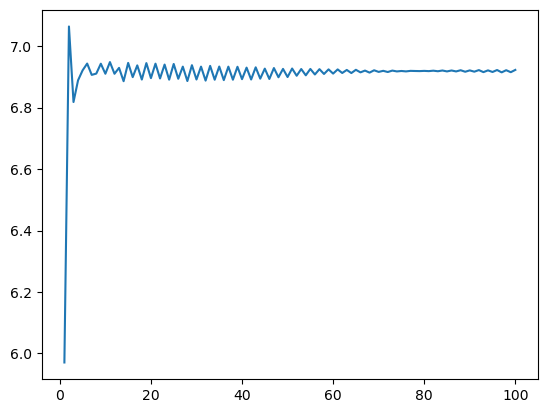

In [119]:
N = 100
p = np.zeros(N)
for n in range(N):
    p[n] = am_put_div(s_0, D, T_D, K, rf, sigma, T, n+2)
plt.plot(np.arange(1, N+1), p, label = 'BI')

In [140]:
# Class 8/16 Path dependent option

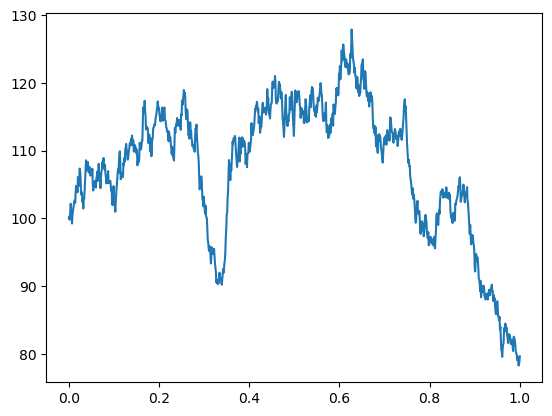

In [141]:
def gen_stock_price(s_0, r, sigma, T, n = 1000):
    dt = T/n
    t = np.linspace(0, T, n+1, endpoint = True)
    S = np.zeros(n+1); S[0] = s_0
    for i in range(n):
        ds = (r*dt + sigma*np.random.normal(0,np.sqrt(dt)))*S[i]
        S[i+1] = S[i]+ds
    return (t,S)

(T,S) = gen_stock_price(100,0.06,0.3,1)
plt.plot(T,S)

#### EU Option

In [134]:
def EU_call(s_0, K, r, sigma, T):
    nSim = 1000
    C = np.zeros(nSim)
    for i in range(nSim):
        _,S = gen_stock_price(s_0, r, sigma, T, n = 1000)
        C_T = np.max([S[-1]-K, 0])
        C[i] = np.exp(-r*T)*C_T
    return C

In [157]:
C = EU_call(100,100,0.06,0.3,1)
# Estimated Call option price
print('Estimated Call option price:')
C.mean()

Estimated Call option price:


14.476432154836614

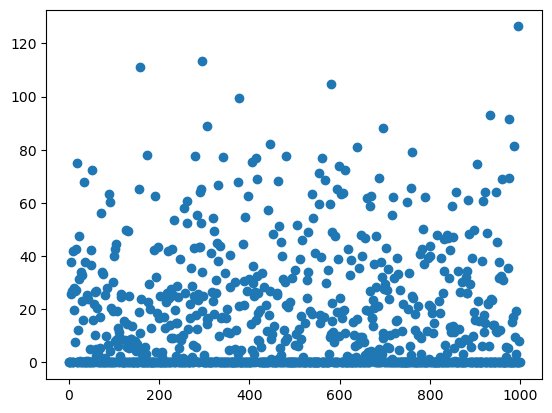

In [131]:
plt.scatter(range(1000), C)

#### Anithetic Variance Reducation Tech

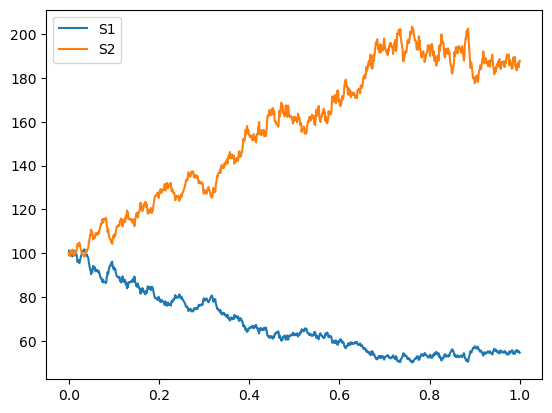

In [145]:
# Reduce the variability => lower standard error and better estimate
def gen_stock_price_anithetic(s_0, r, sigma, T, n = 1000):
    dt = T/n
    t = np.linspace(0, T, n+1, endpoint = True)
    S1 = np.zeros(n+1); S1[0] = s_0
    S2 = np.zeros(n+1); S2[0] = s_0
    for i in range(n):
        dw = np.random.normal(0,np.sqrt(dt))
        ds1 = (r*dt+sigma*dw)*S1[i]
        # oppsite to each other and have strong negative corr
        ds2 = (r*dt-sigma*dw)*S2[i]
        S1[i+1] = S1[i]+ds1
        S2[i+1] = S2[i]+ds2
    return (t,S1, S2)

(T,S1,S2) = gen_stock_price_anithetic(100,0.06,0.3,1)
plt.plot(T,S1,label ='S1')
plt.plot(T,S2,label ='S2')
plt.legend()

Estimated Call option price:
14.751578553806123


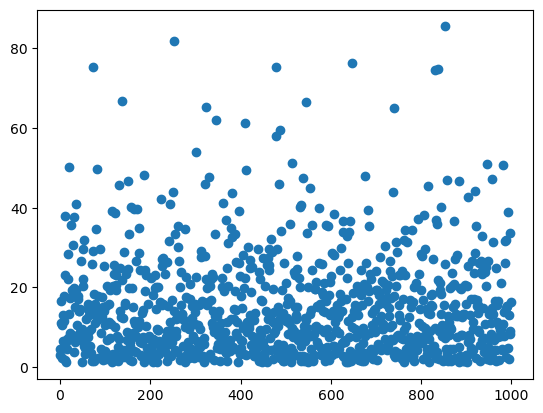

In [156]:
def EU_call_anithetic(s_0, K, r, sigma, T):
    nSim = 1000
    C = np.zeros(nSim)
    for i in range(nSim):
        _,S1,S2 = gen_stock_price_anithetic(s_0, r, sigma, T, n = 1000)
        C_T = (np.max([S1[-1]-K, 0]) + np.max([S2[-1]-K, 0]))/2
        C[i] = np.exp(-r*T)*C_T
    return C
C = EU_call_anithetic(100,100,0.06,0.3,1)
print('Estimated Call option price:')
# Estimated Call option price
print(C.mean())
plt.scatter(range(1000), C)

#### Asian Option
Using the average price to compute the payoff

Estimated Call option price:
7.733065941108007


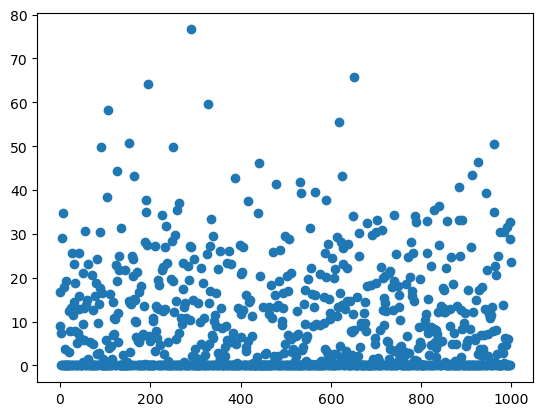

In [155]:
def AS_call(s_0, K, r, sigma, T):
    nSim = 1000
    C = np.zeros(nSim)
    for i in range(nSim):
        _,S = gen_stock_price(s_0, r, sigma, T, n = int(250*T)) # n is the everyday number
        C_T = np.max([S.mean()-K, 0])
        C[i] = np.exp(-r*T)*C_T
    return C

C = AS_call(100,100,0.06,0.3,1)
# Estimated Call option price
print('Estimated Call option price:')
print(C.mean())
plt.scatter(range(1000), C)

#### Lookback Option

In [152]:
def lookback_call(s_0, K, r, sigma, T):
    nSim = 1000
    C = np.zeros(nSim)
    for i in range(nSim):
        _,S = gen_stock_price(s_0, r, sigma, T)
        C_T = np.max([S.max()-K, 0])
        C[i] = np.exp(-r*T)*C_T
    return C

Estimated Call option price:
26.532978474198448


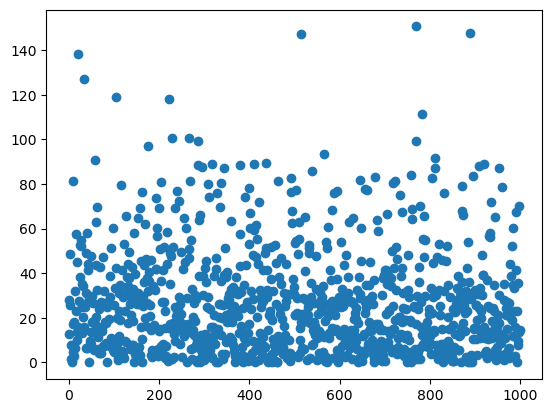

In [158]:
C = lookback_call(100,100,0.06,0.3,1)
# Estimated Call option price
print('Estimated Call option price:')
print(C.mean())
plt.scatter(range(1000), C)

#### Barrier Option

True


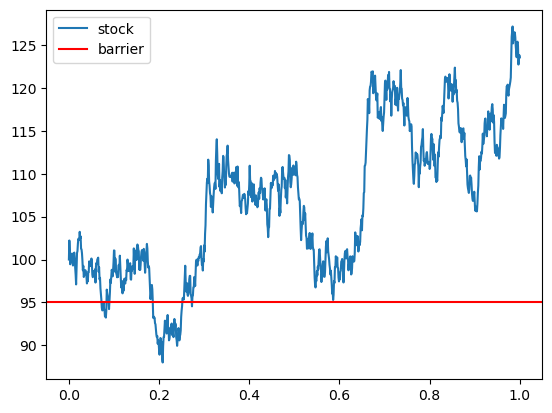

In [175]:
# Call option with knock out barrier when it cross the barrier
(T,S) = gen_stock_price(100,0.06,0.3,1)
# barrier = 95
print(np.any(S < 95))
plt.plot(T,S, label = 'stock')
plt.axhline(y=95, label = 'barrier', color = 'red')
plt.legend()

13.272555176680434


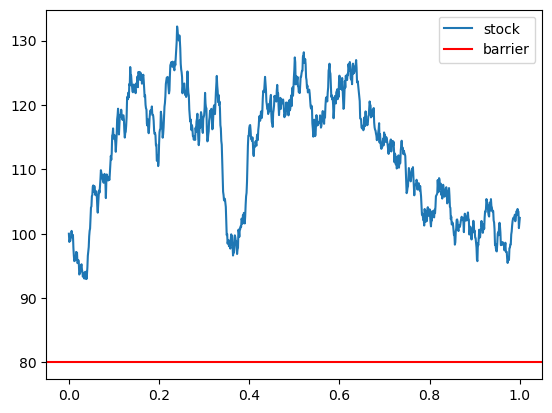

In [184]:
def down_out_call(s_0, K, B, r, sigma, T):
    nSim = 1000
    C = np.zeros(nSim)
    for i in range(nSim):
        t, S = gen_stock_price(s_0, r, sigma, T)
        barrier = np.any(S<B)
        if not barrier:
            dt = t[1] - t[0]
            barrier_prob = np.exp((-2*(S[1:]-B)*(S[:-1]-B)) / (sigma**2 * dt))
            U = np.random.uniform(0,1,size = len(barrier_prob))
            barrier = np.any(U < barrier_prob)
        if not barrier:
            C_T = np.max(S[-1] - K, 0)
            C[i] = np.exp(-r*T)*C_T
    return (t, S, C.mean())

(T, S, C) = down_out_call(100, 100, 80, 0.06, 0.3, 1)
print(C)
plt.plot(T,S, label = 'stock')
plt.axhline(y=80, label = 'barrier', color = 'red')
plt.legend()